<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Dhruv-Solanki/CP03_Prediction_Max_Fours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("C:/Users/hp/Downloads/Studies/Data Mining/cp3/latest.csv")

In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.1,India,Sri Lanka,RG Sharma,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.2,India,Sri Lanka,RG Sharma,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,bowled,RG Sharma,NaN,NaN
2,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.3,India,Sri Lanka,V Kohli,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.4,India,Sri Lanka,V Kohli,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.5,India,Sri Lanka,V Kohli,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     21999
noballs                   22529
byes                      22547
legbyes                   22414
penalty                   22578
wicket_type               21938
player_dismissed          21938
other_wicket_type         22578
other_player_dismissed    22578
dtype: int64

In [ ]:
#creating a wicket column to get boolean of wicket fall
df["wicket"] = df["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [ ]:
#filling na values
df[["wides", "noballs", "byes", "legbyes", "penalty"]] = df[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [ ]:
df.wicket_type.fillna("no wicket", inplace=True)

In [ ]:
df.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [ ]:
df.player_dismissed.fillna("no wicket", inplace=True)

In [ ]:
df[["other_wicket_type", "other_player_dismissed"]] = df[["other_wicket_type", "other_player_dismissed"]].fillna("no dismissal")

In [ ]:
df.isnull().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
wicket                    0
dtype: int64

In [ ]:
#creating over and balls from ball column which is in 0.1, 0.2 format for first over
df["ball"] = df["ball"].astype(str)
df[["over", "ball_num"]] = df["ball"].str.split(".", expand=True).astype(int)
df["ball"] = df["ball"].astype(float)
df["over"] = df["over"] + 1
df["ball_left"] = 306 - (df["over"]*6 + df["ball_num"])

In [ ]:
#creating total runs column to calculate runs on each ball incusive of extras
df["total_runs"] = df["runs_off_bat"] + df["extras"]

In [ ]:
#creating innings df so we can merger total runs for each innings with in original df
innings = df.groupby(["match_id", "innings"])["total_runs"].sum().reset_index()
innings.rename(columns={"total_runs":"innings_total"}, inplace=True)

In [ ]:
#creating deliveries df and adding total runs
data = df.merge(innings, on=["match_id", "innings"])
data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
0,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.1,India,Sri Lanka,RG Sharma,Shubman Gill,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,4,357
1,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.2,India,Sri Lanka,RG Sharma,Shubman Gill,...,bowled,RG Sharma,no dismissal,no dismissal,1,1,2,298,0,357
2,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.3,India,Sri Lanka,V Kohli,Shubman Gill,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,0,357
3,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.4,India,Sri Lanka,V Kohli,Shubman Gill,...,no wicket,no wicket,no dismissal,no dismissal,0,1,4,296,0,357
4,1384424,2023/24,2023-11-02,"Wankhede Stadium, Mumbai",1,0.5,India,Sri Lanka,V Kohli,Shubman Gill,...,no wicket,no wicket,no dismissal,no dismissal,0,1,5,295,0,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,...,no wicket,no wicket,no dismissal,no dismissal,0,35,5,91,0,167
22575,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,...,no wicket,no wicket,no dismissal,no dismissal,0,35,6,90,0,167
22576,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,...,no wicket,no wicket,no dismissal,no dismissal,0,36,1,89,0,167
22577,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,...,no wicket,no wicket,no dismissal,no dismissal,0,36,2,88,6,167


In [ ]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [ ]:
teams = data.batting_team.unique()
teams

array(['India', 'Sri Lanka', 'New Zealand', 'Pakistan', 'South Africa',
       'Netherlands', 'Afghanistan', 'Australia', 'England', 'Bangladesh'],
      dtype=object)

In [ ]:
team_squad = {}
for team in teams:
    player_list = data[data['batting_team'] == team]['striker'].unique().tolist()
    player_list = data[data['batting_team'] == team]['non_striker'].unique().tolist()
    team_squad[team] = player_list
print(team_squad, end=' ')

{'India': ['Shubman Gill', 'V Kohli', 'SS Iyer', 'KL Rahul', 'SA Yadav', 'RA Jadeja', 'Mohammed Shami', 'JJ Bumrah', 'RG Sharma', 'Ishan Kishan', 'HH Pandya', 'Kuldeep Yadav'], 'Sri Lanka': ['FDM Karunaratne', 'BKG Mendis', 'KIC Asalanka', 'AD Mathews', 'PVD Chameera', 'M Theekshana', 'CAK Rajitha', 'D Madushanka', 'MDKJ Perera', 'P Nissanka', 'S Samarawickrama', 'DM de Silva', 'C Karunaratne', 'MD Shanaka', 'DN Wellalage', 'M Pathirana', 'CBRLS Kumara', 'MADI Hemantha'], 'New Zealand': ['R Ravindra', 'DP Conway', 'KS Williamson', 'DJ Mitchell', 'MS Chapman', 'GD Phillips', 'MJ Santner', 'TWM Latham', 'WA Young', 'MJ Henry', 'LH Ferguson', 'JDS Neesham', 'TA Boult', 'TG Southee'], 'Pakistan': ['Fakhar Zaman', 'Abdullah Shafique', 'Babar Azam', 'Imam-ul-Haq', 'Mohammad Rizwan', 'Saud Shakeel', 'Iftikhar Ahmed', 'Mohammad Nawaz', 'Shadab Khan', 'Shaheen Shah Afridi', 'Haris Rauf', 'Hasan Ali', 'Usama Mir', 'Mohammad Wasim'], 'South Africa': ['T Bavuma', 'HE van der Dussen', 'AK Markram',

In [ ]:
venue = data['venue'].unique()
venue

array(['Wankhede Stadium, Mumbai', 'M Chinnaswamy Stadium, Bengaluru',
       'Eden Gardens, Kolkata',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Narendra Modi Stadium, Ahmedabad', 'Arun Jaitley Stadium, Delhi',
       'Maharashtra Cricket Association Stadium, Pune',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'MA Chidambaram Stadium, Chepauk, Chennai'], dtype=object)

In [ ]:
date_format = '%Y-%m-%d'
data['start_date']= pd.to_datetime(data['start_date'], errors='ignore')

In [ ]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs', 'innings_total'],
      dtype='object')

In [ ]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [ ]:
# calculating cumulative runs for each player
data = data.sort_values(by=['match_id','innings','over', 'ball_num'])

In [ ]:
data.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total
5199,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,1,299,0,282
5200,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,2,298,6,282
5201,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no wicket,no wicket,no dismissal,no dismissal,0,1,3,297,1,282


In [ ]:
data['Cumulative_Runs'] = data.groupby(['striker', 'match_id'])['runs_off_bat'].cumsum()

In [ ]:
# Calculate the cumulative count for each batsman
data['Num_Balls_Played'] = data.groupby(['striker', 'match_id']).cumcount() + 1

In [ ]:
# Calculate the strike rate for each row
data['Strike_Rate'] = round(
    (data['Cumulative_Runs'] / data['Num_Balls_Played']) * 100, 2)

In [ ]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [ ]:
data.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,other_player_dismissed,wicket,over,ball_num,ball_left,total_runs,innings_total,Cumulative_Runs,Num_Balls_Played,Strike_Rate
5199,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,1,299,0,282,0,1,0.00
5200,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,2,298,6,282,6,2,300.00
5201,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,3,297,1,282,7,3,233.33
5202,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,no dismissal,0,1,4,296,1,282,1,1,100.00
5203,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,no dismissal,0,1,5,295,4,282,11,4,275.00


so know we have to find the batsmen with the most fours from the above dataframe

In [ ]:
# Assuming your DataFrame is named df
fours_count_by_striker = data[data['runs_off_bat'] == 4].groupby('striker')['runs_off_bat'].count().reset_index()
fours_count_by_striker.columns = ['striker', 'four_count']
fours_count_by_striker = fours_count_by_striker.sort_values(by='four_count', ascending=False)
# Display the result
fours_count_by_striker

,striker,four_count
92,Q de Kock,57
93,R Ravindra,52
28,DP Conway,51
96,RG Sharma,50
126,V Kohli,50
...,...,...
49,JJ Bumrah,1
17,CBRLS Kumara,1
106,SM Curran,1
29,FDM Karunaratne,1


In [ ]:
data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs', 'innings_total', 'Cumulative_Runs', 'Num_Balls_Played',
       'Strike_Rate'],
      dtype='object')

In [ ]:
data.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

Now creating new dataset which consist of fours hit by batsman in each match (each row represent one match)

In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'wicket', 'over', 'ball_num', 'ball_left',
       'total_runs'],
      dtype='object')

In [ ]:
temp = data[['match_id','striker','venue','batting_team','Num_Balls_Played','wicket_type','Strike_Rate','runs_off_bat']]
# temp = temp[(temp['runs_off_bat'] == 4)]
# temp = temp.rename(columns={'runs_off_bat' : 'Four'})
temp

,match_id,striker,venue,batting_team,Num_Balls_Played,wicket_type,Strike_Rate,runs_off_bat
5199,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,0.00,0
5200,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,2,no wicket,300.00,6
5201,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,3,no wicket,233.33,1
5202,1,DJ Malan,"Narendra Modi Stadium, Ahmedabad",England,1,no wicket,100.00,1
5203,1,JM Bairstow,"Narendra Modi Stadium, Ahmedabad",England,4,no wicket,275.00,4
...,...,...,...,...,...,...,...,...
5194,1384433,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,37,no wicket,62.16,1
5195,1384433,HE van der Dussen,"Narendra Modi Stadium, Ahmedabad",South Africa,97,no wicket,78.35,2
5196,1384433,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,38,no wicket,76.32,6
5197,1384433,AL Phehlukwayo,"Narendra Modi Stadium, Ahmedabad",South Africa,39,no wicket,84.62,4


In [ ]:
temp.wicket_type.value_counts()

no wicket            21938
caught                 393
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
Name: wicket_type, dtype: int64

In [ ]:
# Assuming you have a DataFrame named 'temp'
df1 = temp.groupby(['match_id', 'striker'])

def custom_agg(group):
    max_balls_played_index = group['Num_Balls_Played'].idxmax()
    total_four = group[group['runs_off_bat'] == 4].groupby('striker')['runs_off_bat'].count().sum()

    return pd.Series({
        'batting_team': group.loc[max_balls_played_index, 'batting_team'],
        'Num_Balls_Played': group.loc[max_balls_played_index, 'Num_Balls_Played'],
        'venue': group.loc[max_balls_played_index, 'venue'],
        'wicket_type': group.loc[max_balls_played_index, 'wicket_type'],
        'Strike_Rate': group['Strike_Rate'].mean(),
        'Total_Four': total_four,
    })

match = df1.apply(custom_agg).reset_index()

# Convert 'Total_Four' to numeric data type (integer)
match['Total_Four'] = match['Total_Four'].astype(int)


In [ ]:
match

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Four
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",no wicket,83.198571,0
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",caught,100.390000,1
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",caught,54.434400,2
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",no wicket,123.566311,19
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",caught,107.076250,4
...,...,...,...,...,...,...,...,...
759,1384433,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",lbw,101.532553,2
760,1384433,Rahmanullah Gurbaz,Afghanistan,22,"Narendra Modi Stadium, Ahmedabad",caught,82.213182,3
761,1384433,Rahmat Shah,Afghanistan,47,"Narendra Modi Stadium, Ahmedabad",caught,39.407660,2
762,1384433,Rashid Khan,Afghanistan,31,"Narendra Modi Stadium, Ahmedabad",caught,39.540000,0


In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          764 non-null    int64  
 1   striker           764 non-null    object 
 2   batting_team      764 non-null    object 
 3   Num_Balls_Played  764 non-null    int64  
 4   venue             764 non-null    object 
 5   wicket_type       764 non-null    object 
 6   Strike_Rate       764 non-null    float64
 7   Total_Four        764 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 44.9+ KB


In [ ]:
match.venue.unique()

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune',
       'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata'], dtype=object)

In [ ]:
match.sort_values(by=['Total_Four'],ascending = False)

,match_id,striker,batting_team,Num_Balls_Played,venue,wicket_type,Strike_Rate,Total_Four
692,1384430,GJ Maxwell,Australia,130,"Wankhede Stadium, Mumbai",no wicket,108.610308,21
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",no wicket,123.566311,19
110,7,DJ Malan,England,109,"Himachal Pradesh Cricket Association Stadium, ...",bowled,110.578807,16
154,9,RG Sharma,India,87,"Arun Jaitley Stadium, Delhi",bowled,152.709885,16
630,1384426,R Ravindra,New Zealand,102,"M Chinnaswamy Stadium, Bengaluru",caught,88.816471,15
...,...,...,...,...,...,...,...,...
235,14,C Karunaratne,Sri Lanka,11,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,lbw,29.189091,0
605,1384425,A Dutt,Netherlands,23,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,no wicket,34.581739,0
234,14,BKG Mendis,Sri Lanka,13,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,caught,78.703846,0
607,1384425,BFW de Leede,Netherlands,6,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,caught,66.945000,0


In [ ]:
dummies = pd.get_dummies(match['wicket_type'], dtype=int)
match_df = pd.concat([dummies, match], axis=1)

In [ ]:
match.drop(['wicket_type'], axis=1, inplace=True)
match

,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",83.198571,0
1,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",100.390000,1
2,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",54.434400,2
3,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
4,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",107.076250,4
...,...,...,...,...,...,...,...
759,1384433,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",101.532553,2
760,1384433,Rahmanullah Gurbaz,Afghanistan,22,"Narendra Modi Stadium, Ahmedabad",82.213182,3
761,1384433,Rahmat Shah,Afghanistan,47,"Narendra Modi Stadium, Ahmedabad",39.407660,2
762,1384433,Rashid Khan,Afghanistan,31,"Narendra Modi Stadium, Ahmedabad",39.540000,0


In [ ]:
match = pd.concat([dummies, match], axis=1)

In [ ]:
match.head(5)

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
0,0,0,0,0,1,0,0,1,AU Rashid,England,14,"Narendra Modi Stadium, Ahmedabad",83.198571,0
1,0,1,0,0,0,0,0,1,CR Woakes,England,12,"Narendra Modi Stadium, Ahmedabad",100.390000,1
2,0,1,0,0,0,0,0,1,DJ Malan,England,25,"Narendra Modi Stadium, Ahmedabad",54.434400,2
3,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
4,0,1,0,0,0,0,0,1,HC Brook,England,16,"Narendra Modi Stadium, Ahmedabad",107.076250,4


SO in our task 2 our semi finalist teams are India, South Africa, Australia , New Zealand

In [ ]:
match.batting_team.unique()

array(['England', 'New Zealand', 'Netherlands', 'Pakistan', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [ ]:
semi_teams = ['India','South Africa','New Zealand','Australia']

In [ ]:
Most_four_batsmen = match[match['batting_team'].isin(semi_teams)]

In [ ]:
Most_four_batsmen

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
11,0,0,0,0,1,0,0,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,11
13,0,1,0,0,0,0,0,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0
53,0,1,0,0,0,0,0,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",134.190000,14
57,0,0,0,0,1,0,0,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",138.587083,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0,1,0,0,0,0,1384433,DA Miller,South Africa,33,"Narendra Modi Stadium, Ahmedabad",48.368182,1
750,1,0,0,0,0,0,0,1384433,H Klaasen,South Africa,13,"Narendra Modi Stadium, Ahmedabad",80.537692,1
751,0,0,0,0,1,0,0,1384433,HE van der Dussen,South Africa,97,"Narendra Modi Stadium, Ahmedabad",73.781959,6
759,0,0,0,1,0,0,0,1384433,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",101.532553,2


In [ ]:
batsmen_list = Most_four_batsmen.groupby('striker')['Total_Four'].sum().reset_index()

In [ ]:
batsmen_list

,striker,Total_Four
0,A Zampa,5
1,AK Markram,42
2,AL Phehlukwayo,1
3,AT Carey,0
4,C Green,6
5,DA Miller,17
6,DA Warner,42
7,DJ Mitchell,39
8,DP Conway,51
9,G Coetzee,2


In [ ]:
striker_decoded = match['striker']
batting_decoded = match['batting_team']
venue_decoded = match['venue']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def transform_cols(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x) + 1
    return x_encoded, le

In [ ]:
def inverse_transform_cols(x, le):
    x = x - 1
    x_inverse = le.inverse_transform(x)
    return x_inverse

In [ ]:
encoders = {}
encode_cols = ['striker', 'batting_team','venue']

for col in encode_cols:
    match[col], encoders[col] = transform_cols(match[col])

In [ ]:
striker_encoded = match['striker']
batting_encoded = match['batting_team']
venue_encoded = match['venue']

Semi Finals are in Wankhade Mumbai And Eden gardens Kolkata

In [ ]:
match.venue.unique()

array([ 8,  9,  4,  1,  6,  2,  7,  5, 10,  3])

In [ ]:
semis_venue = ['Eden Gardens, Kolkata','Wankhede Stadium, Mumbai']

In [ ]:
selected_batsmen = batsmen_list['striker'].tolist()
selected_batsmen

['A Zampa',
 'AK Markram',
 'AL Phehlukwayo',
 'AT Carey',
 'C Green',
 'DA Miller',
 'DA Warner',
 'DJ Mitchell',
 'DP Conway',
 'G Coetzee',
 'GD Phillips',
 'GJ Maxwell',
 'H Klaasen',
 'HE van der Dussen',
 'HH Pandya',
 'Ishan Kishan',
 'JDS Neesham',
 'JJ Bumrah',
 'JP Inglis',
 'JR Hazlewood',
 'K Rabada',
 'KA Maharaj',
 'KL Rahul',
 'KS Williamson',
 'Kuldeep Yadav',
 'L Ngidi',
 'LH Ferguson',
 'M Jansen',
 'M Labuschagne',
 'MA Starc',
 'MJ Henry',
 'MJ Santner',
 'MP Stoinis',
 'MR Marsh',
 'MS Chapman',
 'Mohammed Shami',
 'PJ Cummins',
 'Q de Kock',
 'R Ravindra',
 'RA Jadeja',
 'RG Sharma',
 'RR Hendricks',
 'SA Yadav',
 'SPD Smith',
 'SS Iyer',
 'Shubman Gill',
 'T Bavuma',
 'T Shamsi',
 'TA Boult',
 'TG Southee',
 'TM Head',
 'TWM Latham',
 'V Kohli',
 'WA Young']

In [ ]:
batsmen_map = {}


batsmen_map = {decoded: encoded for decoded, encoded in zip(striker_decoded, striker_encoded) if decoded in selected_batsmen}

batsmen_map

{'DP Conway': 30,
 'R Ravindra': 106,
 'WA Young': 144,
 'AK Markram': 5,
 'DA Miller': 23,
 'H Klaasen': 37,
 'HE van der Dussen': 39,
 'M Jansen': 68,
 'Q de Kock': 104,
 'T Bavuma': 130,
 'A Zampa': 2,
 'AT Carey': 7,
 'C Green': 16,
 'DA Warner': 24,
 'GJ Maxwell': 36,
 'HH Pandya': 40,
 'Ishan Kishan': 49,
 'JR Hazlewood': 56,
 'KL Rahul': 60,
 'M Labuschagne': 69,
 'MA Starc': 72,
 'MR Marsh': 82,
 'PJ Cummins': 102,
 'RG Sharma': 109,
 'SPD Smith': 120,
 'SS Iyer': 121,
 'V Kohli': 141,
 'DJ Mitchell': 26,
 'GD Phillips': 35,
 'MJ Henry': 77,
 'MJ Santner': 78,
 'MS Chapman': 83,
 'TWM Latham': 135,
 'JP Inglis': 55,
 'K Rabada': 57,
 'KA Maharaj': 58,
 'MP Stoinis': 81,
 'KS Williamson': 61,
 'Shubman Gill': 129,
 'G Coetzee': 34,
 'L Ngidi': 63,
 'RR Hendricks': 111,
 'LH Ferguson': 64,
 'Mohammed Shami': 91,
 'RA Jadeja': 107,
 'SA Yadav': 118,
 'TA Boult': 132,
 'T Shamsi': 131,
 'JDS Neesham': 51,
 'TM Head': 134,
 'JJ Bumrah': 53,
 'Kuldeep Yadav': 62,
 'TG Southee': 133,


In [ ]:
venue_map = {}


venue_map = {decoded: encoded for decoded, encoded in zip(venue_decoded, venue_encoded)}

venue_map

{'Narendra Modi Stadium, Ahmedabad': 8,
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 9,
 'Himachal Pradesh Cricket Association Stadium, Dharamsala': 4,
 'Arun Jaitley Stadium, Delhi': 1,
 'MA Chidambaram Stadium, Chepauk, Chennai': 6,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 2,
 'Maharashtra Cricket Association Stadium, Pune': 7,
 'M Chinnaswamy Stadium, Bengaluru': 5,
 'Wankhede Stadium, Mumbai': 10,
 'Eden Gardens, Kolkata': 3}

In [ ]:
teams_map = {}
teams_map = {decoded: encoded for decoded, encoded in zip(batting_decoded, batting_encoded) if decoded in semi_teams}
teams_map

{'New Zealand': 7, 'South Africa': 9, 'Australia': 2, 'India': 5}

In [ ]:
Most_four_batsmen

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,1,DP Conway,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
11,0,0,0,0,1,0,0,1,R Ravindra,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,11
13,0,1,0,0,0,0,0,1,WA Young,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0
53,0,1,0,0,0,0,0,4,AK Markram,South Africa,57,"Arun Jaitley Stadium, Delhi",134.190000,14
57,0,0,0,0,1,0,0,4,DA Miller,South Africa,24,"Arun Jaitley Stadium, Delhi",138.587083,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0,1,0,0,0,0,1384433,DA Miller,South Africa,33,"Narendra Modi Stadium, Ahmedabad",48.368182,1
750,1,0,0,0,0,0,0,1384433,H Klaasen,South Africa,13,"Narendra Modi Stadium, Ahmedabad",80.537692,1
751,0,0,0,0,1,0,0,1384433,HE van der Dussen,South Africa,97,"Narendra Modi Stadium, Ahmedabad",73.781959,6
759,0,0,0,1,0,0,0,1384433,Q de Kock,South Africa,47,"Narendra Modi Stadium, Ahmedabad",101.532553,2


In [ ]:
Most_four_batsmen = Most_four_batsmen.copy()

In [ ]:
Most_four_batsmen['striker'] = Most_four_batsmen['striker'].map(batsmen_map)

In [ ]:
Most_four_batsmen.head(3)

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,1,30,New Zealand,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
11,0,0,0,0,1,0,0,1,106,New Zealand,98,"Narendra Modi Stadium, Ahmedabad",117.910306,11
13,0,1,0,0,0,0,0,1,144,New Zealand,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0


In [ ]:
Most_four_batsmen['batting_team'] = Most_four_batsmen['batting_team'].map(teams_map)

In [ ]:
Most_four_batsmen.head(3)

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,1,30,7,122,"Narendra Modi Stadium, Ahmedabad",123.566311,19
11,0,0,0,0,1,0,0,1,106,7,98,"Narendra Modi Stadium, Ahmedabad",117.910306,11
13,0,1,0,0,0,0,0,1,144,7,1,"Narendra Modi Stadium, Ahmedabad",0.000000,0


In [ ]:
Most_four_batsmen['venue'] = Most_four_batsmen['venue'].map(venue_map)

In [ ]:
Most_four_batsmen.head(3)

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,1,30,7,122,8,123.566311,19
11,0,0,0,0,1,0,0,1,106,7,98,8,117.910306,11
13,0,1,0,0,0,0,0,1,144,7,1,8,0.000000,0


In [ ]:
match.columns

Index(['bowled', 'caught', 'caught and bowled', 'lbw', 'no wicket', 'run out',
       'stumped', 'match_id', 'striker', 'batting_team', 'Num_Balls_Played',
       'venue', 'Strike_Rate', 'Total_Four'],
      dtype='object')

Modeling

In [ ]:
match.head(5)

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,match_id,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
0,0,0,0,0,1,0,0,1,9,4,14,8,83.198571,0
1,0,1,0,0,0,0,0,1,21,4,12,8,100.390000,1
2,0,1,0,0,0,0,0,1,25,4,25,8,54.434400,2
3,0,0,0,0,1,0,0,1,30,7,122,8,123.566311,19
4,0,1,0,0,0,0,0,1,38,4,16,8,107.076250,4


In [ ]:
match.drop(['match_id'],axis=1, inplace = True)
Most_four_batsmen.drop(['match_id'],axis=1, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalizing numeric columns
scaler = MinMaxScaler()
match[['Num_Balls_Played', 'Strike_Rate', 'Total_Four']] = scaler.fit_transform(match[['Num_Balls_Played', 'Strike_Rate', 'Total_Four']])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
sequence_length = 3
X, y = [], []

for i in range(len(match) - sequence_length):
    X.append(match.iloc[i:i+sequence_length, :-1])
    y.append(match.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the neural network model
model = Sequential()

In [ ]:
# Build LSTM Model
model.add(LSTM(units=70, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
19/19 [==============================] - 3s 45ms/step - loss: 20.9639 - val_loss: 3.5179
Epoch 2/30
19/19 [==============================] - 0s 9ms/step - loss: 1.1680 - val_loss: 0.6084
Epoch 3/30
19/19 [==============================] - 0s 9ms/step - loss: 0.3157 - val_loss: 0.1865
Epoch 4/30
19/19 [==============================] - 0s 9ms/step - loss: 0.1801 - val_loss: 0.1271
Epoch 5/30
19/19 [==============================] - 0s 9ms/step - loss: 0.1286 - val_loss: 0.0934
Epoch 6/30
19/19 [==============================] - 0s 9ms/step - loss: 0.0970 - val_loss: 0.0699
Epoch 7/30
19/19 [==============================] - 0s 9ms/step - loss: 0.0674 - val_loss: 0.0372
Epoch 8/30
19/19 [==============================] - 0s 8ms/step - loss: 0.0507 - val_loss: 0.0456
Epoch 9/30
19/19 [==============================] - 0s 9ms/step - loss: 0.0483 - val_loss: 0.0325
Epoch 10/30
19/19 [==============================] - 0s 9ms/step - loss: 0.0414 - val_loss: 0.0282
Epoch 11/30
19/19

In [ ]:
# Extract loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Plotting
epochs = range(1, len(loss) + 1)

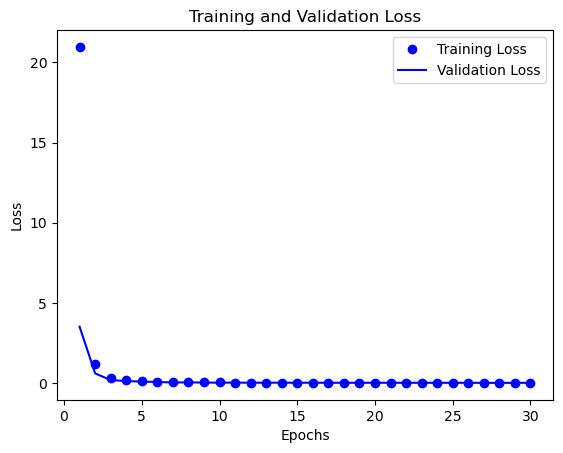

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bowled             764 non-null    int32  
 1   caught             764 non-null    int32  
 2   caught and bowled  764 non-null    int32  
 3   lbw                764 non-null    int32  
 4   no wicket          764 non-null    int32  
 5   run out            764 non-null    int32  
 6   stumped            764 non-null    int32  
 7   striker            764 non-null    int32  
 8   batting_team       764 non-null    int32  
 9   Num_Balls_Played   764 non-null    float64
 10  venue              764 non-null    int32  
 11  Strike_Rate        764 non-null    float64
 12  Total_Four         764 non-null    float64
dtypes: float64(3), int32(10)
memory usage: 47.9 KB


In [ ]:
Most_four_batsmen

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
3,0,0,0,0,1,0,0,30,7,122,8,123.566311,19
11,0,0,0,0,1,0,0,106,7,98,8,117.910306,11
13,0,1,0,0,0,0,0,144,7,1,8,0.000000,0
53,0,1,0,0,0,0,0,5,9,57,1,134.190000,14
57,0,0,0,0,1,0,0,23,9,24,1,138.587083,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0,1,0,0,0,0,23,9,33,8,48.368182,1
750,1,0,0,0,0,0,0,37,9,13,8,80.537692,1
751,0,0,0,0,1,0,0,39,9,97,8,73.781959,6
759,0,0,0,1,0,0,0,104,9,47,8,101.532553,2


Now using train model to predict the most fours for selected Batsmen

In [ ]:
selected_batsmen_encoded = Most_four_batsmen['striker'].unique()
print(f"selected_batsmen_encoded: {selected_batsmen_encoded}")

selected_batsmen_encoded: [ 30 106 144   5  23  37  39  68 104 130   2   7  16  24  36  40  49  56
  60  69  72  82 102 109 120 121 141  26  35  77  78  83 135  55  57  58
  81  61 129  34  63 111  64  91 107 118 132 131  51 134  53  62 133   6]


In [ ]:
# Function to predict most four for batsmen
def predict_four_for_batsmen(model, Most_four_batsmen, scaler, sequence_length):
    selected_sequences = []
    for batsman in Most_four_batsmen['striker'].unique().tolist():
        batsman_data = Most_four_batsmen[Most_four_batsmen['striker'] == batsman]
        batsman_data = batsman_data.copy()
        batsman_sequence = batsman_data.iloc[-sequence_length:, :-1].values
        predicted_four = model.predict(np.array([batsman_sequence]))

        avg_values = batsman_data.mean()
        predicted_row = pd.DataFrame({
            #'Not Out': [int(avg_values['Not Out'])],
            #'Out': [1 - int(avg_values['Not Out'])],
            'bowled': [int(avg_values['bowled'])],
            'caught': [int(avg_values['caught'])],
            'caught and bowled': [int(avg_values['caught and bowled'])],
            'lbw': [int(avg_values['lbw'])],
            'no wicket': [int(avg_values['no wicket'])],
            'run out': [int(avg_values['run out'])],
            'stumped': [int(avg_values['stumped'])],
            'striker': [batsman],
            'batting_team': [int(avg_values['batting_team'])],
            'Num_Balls_Played': [int(avg_values['Num_Balls_Played'])],
            'venue' : [int(avg_values['venue'])],
            'Strike_Rate': [avg_values['Strike_Rate']],
            'Total_Four': int(predicted_four[0]),
        })

        print(predicted_row)
        Most_four_batsmen = pd.concat([Most_four_batsmen, predicted_row], ignore_index=True)

    Most_four_batsmen.sort_values(by='striker', inplace=True)

    return Most_four_batsmen

In [ ]:
predicted_df_initial = predict_four_for_batsmen(model, Most_four_batsmen, scaler, sequence_length)

1/1 [==============================] - 0s 122ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0       30             7                40      6    69.475269          24  
1/1 [==============================] - 0s 74ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      106             7                59      6    74.585172          30  
1/1 [==============================] - 0s 66ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      144 

1/1 [==============================] - 0s 48ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      109             5                45      5    128.69835          36  
1/1 [==============================] - 0s 49ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      120             2                34      4    73.646738          32  
1/1 [==============================] - 0s 50ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      121  

1/1 [==============================] - 0s 55ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      132             7                 7      5    51.275833          17  
1/1 [==============================] - 0s 58ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          1        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      131             9                 5      4    94.438393          11  
1/1 [==============================] - 0s 66ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0       51  

In [ ]:
predicted_df_initial

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
233,0,1,0,0,0,0,0,2,2,19,8,146.353684,4
101,0,0,0,0,1,0,0,2,2,2,5,25.000000,0
147,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
295,0,0,0,0,0,0,0,2,2,10,4,62.765633,4
168,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0,1,0,0,0,0,0,144,7,1,8,0.000000,0
95,0,1,0,0,0,0,0,144,7,64,6,64.061562,4
287,0,0,0,0,0,0,0,144,7,41,6,61.950793,21
188,0,1,0,0,0,0,0,144,7,39,4,63.339744,4


54 instances more added through prediction of total fours scored by each batsman in both the semi finals. Now as or task 2 predicts that final will be between INDIA and South Africa. So i am going to predict the batsmens wise most fours in final

In [ ]:
finale_teams_decoded = ['India', 'South Africa']
finale_teams_encoded = [5, 9]

In [ ]:
finale_batsmen_df = predicted_df_initial[predicted_df_initial['batting_team'].isin(finale_teams_encoded)]
finale_batsmen_df

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
77,1,0,0,0,0,0,0,5,9,3,4,61.110000,0
112,0,1,0,0,0,0,0,5,9,46,10,99.549783,4
140,0,1,0,0,0,0,0,5,9,70,10,69.258286,7
157,0,1,0,0,0,0,0,5,9,96,6,112.307500,7
199,0,0,0,0,1,0,0,5,9,1,7,600.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,1,0,0,141,5,128,3,81.386953,10
311,0,0,0,0,0,0,0,141,5,79,5,73.255058,45
224,0,1,0,0,0,0,0,141,5,96,10,89.732604,11
39,0,0,0,0,1,0,0,141,5,57,1,88.002632,6


In [ ]:
finale_batsmen_encoded = finale_batsmen_df['striker'].unique().tolist()
finale_batsmen_decoded = [batsman for num in finale_batsmen_encoded for batsman, value in batsmen_map.items() if value == num]

In [ ]:
predicted_df_finale = predict_four_for_batsmen(model, finale_batsmen_df, scaler, sequence_length)

1/1 [==============================] - 0s 66ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0        5             9                39      5   152.020231          35  
1/1 [==============================] - 0s 52ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          1        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0        6             9                40      8     45.53225          15  
1/1 [==============================] - 0s 51ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0       23  

1/1 [==============================] - 0s 42ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      130             9                28      4    74.042397          23  
1/1 [==============================] - 0s 44ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          1        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      131             9                 5      4    94.438393          17  
1/1 [==============================] - 0s 44ms/step
   bowled  caught  caught and bowled  lbw  no wicket  run out  stumped  \
0       0       0                  0    0          0        0        0   

   striker  batting_team  Num_Balls_Played  venue  Strike_Rate  Total_Four  
0      141  

In [ ]:
predicted_df_finale

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
0,1,0,0,0,0,0,0,5,9,3,4,61.110000,0
9,0,0,0,0,0,0,0,5,9,39,5,152.020231,38
8,0,1,0,0,0,0,0,5,9,57,1,134.190000,14
7,0,1,0,0,0,0,0,5,9,46,2,79.666304,7
6,0,1,0,0,0,0,0,5,9,32,8,66.821875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,1,0,0,141,5,128,3,81.386953,10
154,0,0,0,0,0,0,0,141,5,79,5,73.255058,45
155,0,1,0,0,0,0,0,141,5,96,10,89.732604,11
157,0,1,0,0,0,0,0,141,5,119,6,54.649748,6


In [ ]:
final_df = pd.concat([predicted_df_initial, predicted_df_finale], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [ ]:
final_df

,bowled,caught,caught and bowled,lbw,no wicket,run out,stumped,striker,batting_team,Num_Balls_Played,venue,Strike_Rate,Total_Four
0,0,1,0,0,0,0,0,2,2,19,8,146.353684,4
1,0,0,0,0,1,0,0,2,2,2,5,25.000000,0
2,0,0,0,0,1,0,0,2,2,1,1,100.000000,0
3,0,0,0,0,0,0,0,2,2,10,4,62.765633,4
4,1,0,0,0,0,0,0,2,2,3,4,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0,0,0,0,0,0,0,121,5,38,5,78.188536,36
358,0,0,0,0,0,0,0,129,5,38,5,90.876506,22
359,0,0,0,0,0,0,0,130,9,28,4,74.042397,23
360,0,0,0,0,1,0,0,131,9,5,4,94.438393,17


In [ ]:
batsmen_name_map = {v: k for k, v in batsmen_map.items()}
teams_name_map = {v: k for k, v in teams_map.items()}

In [ ]:
final_df['striker'] = final_df['striker'].map(batsmen_name_map)
final_df['batting_team'] = final_df['batting_team'].map(teams_name_map)

In [ ]:
four_by_batsman = final_df.groupby(['striker', 'batting_team'])['Total_Four'].sum().reset_index()

In [ ]:
four_by_batsman.sort_values(by = ['Total_Four'],ascending = False,inplace = True)

In [ ]:
top_5_batsmen = four_by_batsman.head(5)
top_5_batsmen

,striker,batting_team,Total_Four
52,V Kohli,India,143
37,Q de Kock,South Africa,134
40,RG Sharma,India,124
1,AK Markram,South Africa,115
11,GJ Maxwell,Australia,101


In [ ]:
Most_four_batsmen['striker'] = Most_four_batsmen['striker'].map(batsmen_name_map)
Most_four_batsmen['batting_team'] = Most_four_batsmen['batting_team'].map(teams_name_map)

In [ ]:
Most_six_batsmen = Most_six_batsmen.groupby(['striker', 'batting_team'])['Total_Six'].sum().reset_index()
Most_six_batsmen.sort_values(by= ['Total_Six'],ascending = False).head(5)

,striker,batting_team,Total_Six
40,RG Sharma,India,24
11,GJ Maxwell,Australia,22
37,Q de Kock,South Africa,21
33,MR Marsh,Australia,20
6,DA Warner,Australia,20
